In [1]:
#  Imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)


In [2]:
from rho_X import rho
import codecs
file = codecs.open('/home/kruteesh/Desktop/Solar_neutrinos/rho.txt', 'r', 'UTF-8')
print(file)
tline = file.readlines()
b=tline[5:]
r_ratio=[]
rho_data=[]
c=[]
for i in b:
    r_ratio.append(float(i.split(' ')[1]))

    rho_data.append(float(i.split(' ')[3]))
"The Sun and the X for the path from sun "
R_sun=6.957e10
h_list=[0,0.001,0.5,0.99999,0.99999999]
new_h=np.array([h*R_sun for h in h_list])
#print(new_h)
x2rho={}
final_X={}#the dictionaries
for h in new_h:
    
    rhh=rho(R_sun,h,r_ratio,rho_data)
    x2rho[h]=rhh.X2rho()
    final_X[h]=rhh.final_X()

FileNotFoundError: [Errno 2] No such file or directory: '/home/kruteesh/Desktop/Solar_neutrinos/rho.txt'

In [3]:
import Lambdas_i_ms as Lambdas 


In [4]:
# MCEq Imports
from MCEq.particlemanager import ParticleManager
import MCEq.core 
from MCEq.core import MCEqRun
from MCEq.data import Decays
import mceq_config as config
#import primary model choices
import crflux.models as pm


In [5]:
#config.A_target=1.2
config.muon_helicity_dependence=True

In [6]:
# Silincing mceq, set to 1 or higher for output
config.debug_level = 0

# Launcing mceq
mceq_run = MCEqRun(
    #provide the string of the interaction model
    interaction_model='SIBYLL23CPP',
    #primary cosmic ray flux model
    primary_model = (pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0
    
)

In [8]:
mceq_run.pman[2212].cs-mceq_run.pman[2212].inel_cross_section()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [7]:
#list of particles in concern
list_particles=[mceq_run.pman[2212],     #p+           (0)
                mceq_run.pman[-2212],     #pbar-        (1)
                mceq_run.pman[2112],     #n            (2)
                mceq_run.pman[-2112],    #nbar         (3)
                mceq_run.pman[211],      #pi+          (4)
                mceq_run.pman[-211],     #pi-          (5)
                mceq_run.pman[310],      #K_S0         (6) 
                mceq_run.pman[130],      #K_L0         (7)
                mceq_run.pman[321],      #K+           (8)
                mceq_run.pman[-321],     #K-           (9)
                mceq_run.pman[111],      #pi0          (10)
                mceq_run.pman[-3122],    #Lambda_r0    (11)
                mceq_run.pman[3122],     #Lambda0      (12)
                mceq_run.pman[13],   #mu-          (13)
                mceq_run.pman[-13],  #mu+          (14)
                mceq_run.pman[-11],      #e+           (15)   
                mceq_run.pman[11],       #e-           (16)
                mceq_run.pman[12],       #numu         (23)
                mceq_run.pman[-12],      #numubar      (24)
                mceq_run.pman[14],       #nue          (21)
                mceq_run.pman[-14],      #nuebar       (22)
                mceq_run.pman[22]#gamma        (25)
               ]

In [8]:
Name=[r"$P^{+}$",
      r"$\overline{P}^{-}$",
      r"$n^0$",
      r"$\overline{n}$",
      r"$\pi^{+}$",
      r"$\pi^{-}$",
      r"$K_{S}^0$"
      ,r"$K_{L}^0$",
      r"$K^{+}$",
      r"$K^{-}$",
      r"$\pi^{0}$",
      r"$\Lambda_{r}^{0}$",
      r'$\Lambda^{0}$',
      r"$\mu^{-}$",
      r"$\mu^{+}$",
      r"$e^{+}$",
      r"$e^{-}$",
      r"$\nu_{e}$",
      r"$\overline{\nu}_{e}$",
      r"$\nu_{\mu}$"
      ,r"$\overline{\nu}_{\mu}$" ,
      r'$\gamma$'
    
]


In [9]:
#list of pdg ids 
list_particles_pdg_id=[]
for i in range(0,len(list_particles)):
    list_particles_pdg_id.append(list_particles[i].pdg_id[0])

In [10]:
"""""
For indices of the particles in phi 
"""""
j=0
ind={}
for i in list_particles:
    ind[i.name,'up']=0+j
    ind[i.name,'low']=121+j
    j=j+121

In [11]:
mceq_run.pman[2212].hadr_yields[mceq_run.pman[211]]

array([[1.84722353e-02, 2.45632358e-02, 3.26093280e-02, ...,
        5.34272427e+09, 7.26003112e+09, 9.15245904e+09],
       [0.00000000e+00, 2.22609507e-02, 3.09031802e-02, ...,
        4.18491401e+09, 5.50625779e+09, 6.86768389e+09],
       [0.00000000e+00, 0.00000000e+00, 2.61138027e-02, ...,
        2.95009264e+09, 4.08854864e+09, 5.21729366e+09],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.22723635e-04, 1.20293457e-03, 4.76167298e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.42325259e-04, 1.20271169e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.31937855e-04]])

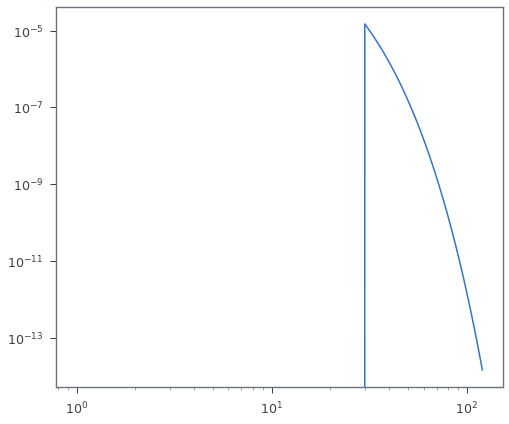

In [28]:
plt.loglog(L_dec[ind[mceq_run.pman[321].name,"up"]:ind[mceq_run.pman[321].name,"low"]])

In [17]:
L_dec={}
L_in={}

A=1.9465 # average molar mass of sun 
A_air=14.6567
N_A=scipy.constants.N_A
I_models=["EPOSLHC","DPMJETIII306","QGSJETII03","QGSJETII04","SIBYLL23","SIBYLL23C","SIBYLL23C03","SIBYLL23CPP"]
for im in I_models:
    
    mceq_run.set_interaction_model(im)
    p=mceq_run.pman[211]
    #sigma=p.inel_cross_section(mbarn=False)/(A_air)**(2/3)
    print(im)
    print(mceq_run.pman[2212].hadr_yields[mceq_run.pman[11]][-1])    
    #L_in[im]=(N_A*sigma) / A**(1/3)
    #print(sigma[-1],(N_A*sigma)/A**(1/3))
    #M,L_dec_file=Lambdas.inverse_lengths(list_particles).inv_L_dec()
    #print(L_dec[im][ind[p.name,"up"]:ind[p.name,"low"]])
    #N,L_in_file=Lambdas.inverse_lengths(list_particles).inv_L_inte()

EPOSLHC
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+0

SIBYLL23CPP
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e

In [68]:
(L_in[I_models[0]])- L_in_file[ind[mceq_run.pman[321].name,"up"]:ind[mceq_run.pman[321].name,"low"]]

array([-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00104772,  0.00268694,
        0.00403642,  0.00509615,  0.00586613,  0.00634637,  0.00653687,
        0.00643762,  0.00609882,  0.00572532,  0.00533966,  0.0049741 ,
        0.00464704,  0.00435846,  0.00410837,  0.00389678,  0.00372367,
        0.00358905,  0.00348228,  0.0033819 ,  0.00304178,  0.00274073,
        0.00247586,  0.00224427,  0.00204307,  0.00204125,  0.00204036,
        0.00204041,  0.00204141,  0.00204334,  0.0020462 ,  0.00205001,
        0.00205475,  0.00206044,  0.00206706,  0.00207814,  0.00210529,
        0.00214942,  0.00221053,  0.00228861,  0.00238367,  0.00249571,
        0.00262301,  0.00274117,  0.00284221,  0.00292614,  0.00299295,
        0.00304265,  0.00307523,  0.0030907 ,  0.00310658,  0.00314265,
        0.00319891,  0.00327538,  0.00337163,  0.00339511,  0.00327537,
        0.00305044,  0.0028646 ,  0.00273184,  0.00265217,  0.00

<ipython-input-65-1e028ed093f2>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/(L_in_file[ind[mceq_run.pman[321].name,"up"]:ind[mceq_run.pman[321].name,"low"]]))


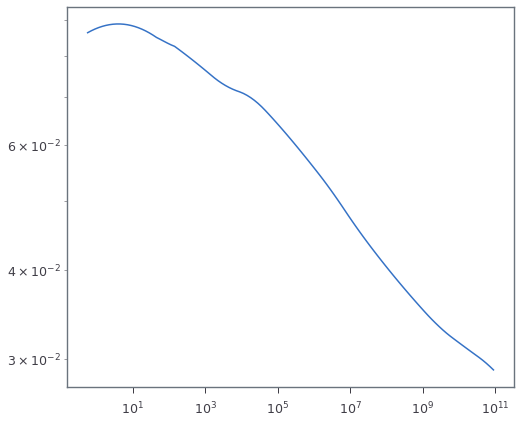

In [65]:
plt.loglog(mceq_run.e_grid,0.0012/(L_in_file[ind[mceq_run.pman[321].name,"up"]:ind[mceq_run.pman[321].name,"low"]]))

In [ ]:
for j,im in enumerate(I_models):
    C_1=1/L_dec[I_models[j-1]]
    C_2=1/L_dec[im]
    print(im,I_models[j-1],C_1-C_2)

In [31]:
ls=['r^','g*','k.','y.','c-.','b.']

In [50]:
mceq_run.pman[211].inel_cross_section(mbarn=False)/(A_air)**(2/3)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.09893333e-26, 3.42087089e-26, 3.68498664e-26, 3.89128060e-26,
       4.03975276e-26, 4.13040312e-26, 4.16323169e-26, 4.13823845e-26,
       4.06583070e-26, 3.98848061e-26, 3.91086007e-26, 3.83966005e-26,
       3.77869186e-26, 3.72795549e-26, 3.68745097e-26, 3.65717827e-26,
       3.63713741e-26, 3.62732837e-26, 3.62554682e-26, 3.62734024e-26,
       3.59388267e-26, 3.56164360e-26, 3.52947233e-26, 3.49844849e-26,
       3.46587036e-26, 3.47915341e-26, 3.49316856e-26, 3.50940457e-26,
       3.52656360e-26, 3.54658714e-26, 3.56740905e-26, 3.59074082e-26,
       3.61475849e-26, 3.64095092e-26, 3.66772818e-26, 3.69637027e-26,
       3.72554680e-26, 3.75643423e-26, 3.78777225e-26, 3.82055632e-26,
       3.85599073e-26, 3.89995690e-26, 3.94526265e-26, 3.99488336e-26,
       4.04595227e-26, 4.10168900e-26, 4.15897225e-26, 4.22124224e-26,
      

<ipython-input-71-1d7d034e085a>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)
<ipython-input-71-1d7d034e085a>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)
<ipython-input-71-1d7d034e085a>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)
<ipython-input-71-1d7d034e085a>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)
<ipython-input-71-1d7d034e085a>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)
<ipython-input-71-1d7d034e085a>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)


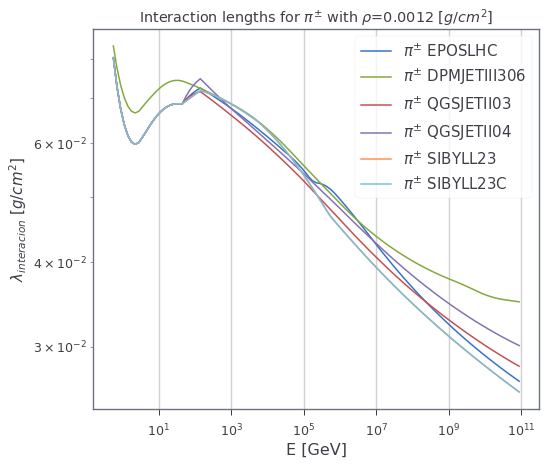

In [71]:
names=[r"$\pi^{\pm}$",r"$K^{\pm}$", r"$n^0$"]
for k,im in enumerate(I_models[:-1]):
    
    
    plt.title(r"Interaction lengths for $\pi^{\pm}$ with $\rho$=0.0012 $[g/cm^2]$")

    plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[0]+" "+im)
    plt.ylabel(r"$\lambda_{interacion}$ $[g/cm^2]$",fontsize=15)
    
    plt.xlabel("E [GeV]",fontsize=16)
    plt.legend(fontsize=15)

plt.grid()

<ipython-input-73-450a16266d0d>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)
<ipython-input-73-450a16266d0d>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)
<ipython-input-73-450a16266d0d>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)
<ipython-input-73-450a16266d0d>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)
<ipython-input-73-450a16266d0d>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)
<ipython-input-73-450a16266d0d>:7: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)


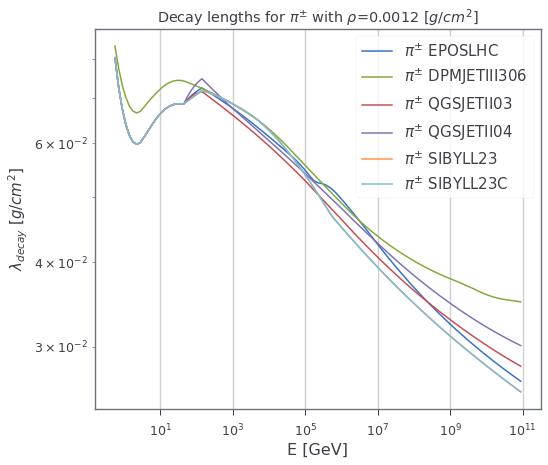

In [73]:
names=[r"$\pi^{\pm}$",r"$K^{\pm}$", r"$n^0$"]
for k,im in enumerate(I_models[:-1]):
    
    for j,i in enumerate([mceq_run.pman[321]]):
        plt.title(r"Interaction lengths for $\pi^{\pm}$ with $\rho$=0.0012 $[g/cm^2]$")

        plt.loglog(mceq_run.e_grid,0.0012/L_in[im],label=names[j]+" "+im)
        plt.ylabel(r"$\lambda_{interaction}$ $[g/cm^2]$",fontsize=15)
        plt.xlabel("E [GeV]",fontsize=16)
        plt.legend(fontsize=15)

plt.grid()

In [ ]:
names=[r"$\pi^{\pm}$",r"$K^{\pm}$", r"$n^0$"]
 for im in I_models:
    for j,i in enumerate([mceq_run.pman[211],mceq_run.pman[321],mceq_run.pman[2112]]):
        plt.title(r"Interaction lengths for $K^{\pm}$,$\pi^{\pm}$ and $n^0$ with A=1.9465")

        plt.loglog(mceq_run.e_grid,1/L_in[im][ind[i.name,'up']:ind[i.name,'low']],'-',label=names[j]+" "+im)
        plt.ylabel(r"$\lambda_{interaction}$ $[g/cm^2]$",fontsize=15)
        plt.xlabel("E [GeV]",fontsize=16)
        plt.legend(fontsize=15)
    plt.xlim((200,1e11))  
    plt.grid()